In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Загрузка данных
df = pd.read_csv('C:/Users/fkola/Drivee/incity_detail_202504151000_Processed.csv')

# Преобразование времени (если нужно)
df['tender_timestamp'] = pd.to_datetime(df['tender_timestamp'])
df['hour'] = df['tender_timestamp'].dt.hour

# Фильтр завершённых поездок
df = df[(df['status_order'] == 'done') & (df['status_tender'] == 'done')]

In [3]:
# Подготовка данных
X = df[['order_id', 'user_id', 'driver_id', 'distance_in_meters_from_to','h_coaf', 'match_rating', 'short', 'long', 'medium?', 'distance_match']]  # Признаки
y = df['price_tender_local']                          # Целевая переменная    это когда рейтинги одинаковые 1 когда разные 0

# Обучение модели
model = LinearRegression()
model.fit(X, y)

# Коэффициенты регрессии
print(f"!Это просто прототип модели!")
print(f"Коэффициент для расстояния: {model.coef_[0]:.2f} (руб/м)")
print(f"Коэффициент для времени: {model.coef_[1]:.2f} (руб/мин)")
print(f"Базовая цена: {model.intercept_:.2f} руб")
#pivot_table = df.pivot_table(index='distance_in_meters', columns='duration_in_seconds', values='price_tender_local', aggfunc='mean')
#plt.figure(figsize=(12, 8))
#sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.1f')
#plt.title('Тепловая карта: Цена от расстояния и времени')
#plt.show()


!Это просто прототип модели!
Коэффициент для расстояния: 0.01 (руб/м)
Коэффициент для времени: 0.11 (руб/мин)
Базовая цена: 191.06 руб


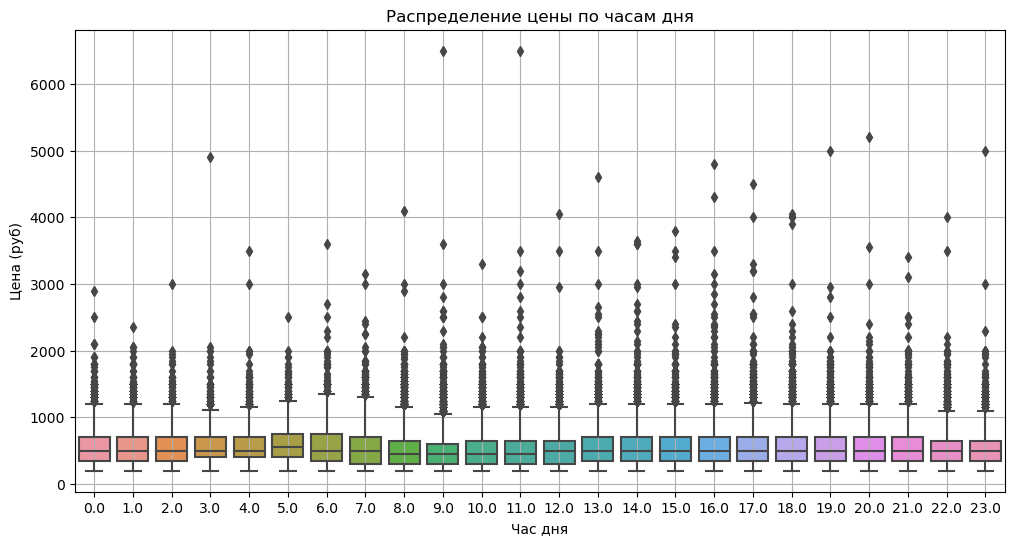

In [4]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='price_tender_local', data=df)
plt.title('Распределение цены по часам дня')
plt.xlabel('Час дня')
plt.ylabel('Цена (руб)')
plt.grid(True)
plt.show()

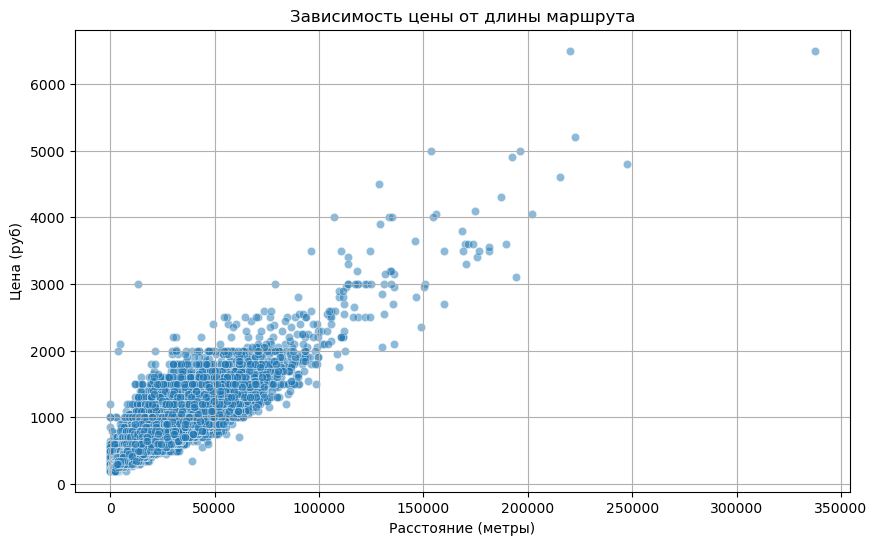

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_in_meters', y='price_tender_local', data=df, alpha=0.5)
plt.title('Зависимость цены от длины маршрута')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Цена (руб)')
plt.grid(True)
plt.show()

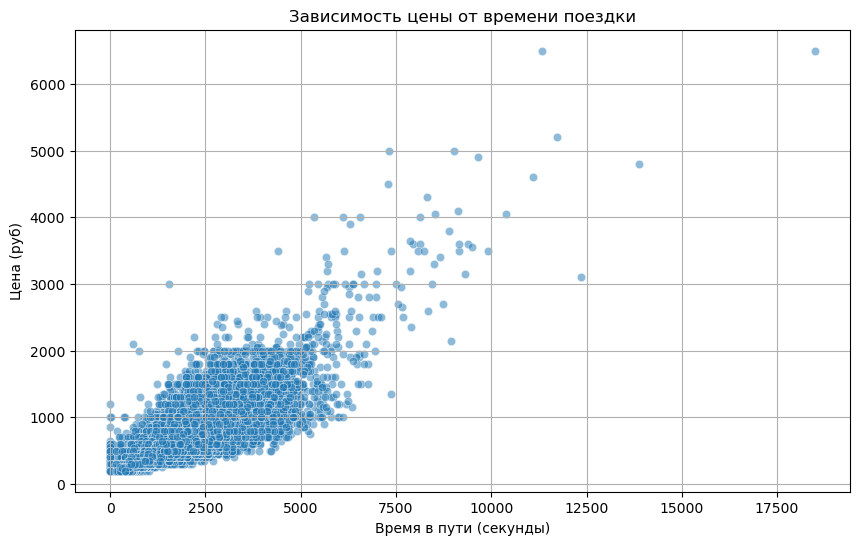

In [6]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_in_seconds', y='price_tender_local', data=df, alpha=0.5)
plt.title('Зависимость цены от времени поездки')
plt.xlabel('Время в пути (секунды)')
plt.ylabel('Цена (руб)')
plt.grid(True)
plt.show()